Installing necassary libraries and datasets

In [ ]:
 !pip install nfl_data_py
 !pip install pandas
 !pip install os
 !pip install matplotlib

importing the libraries and datasets

In [13]:
import nfl_data_py as nfl
import pandas as pd
import os
import urllib.request
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

In [22]:
pbp = nfl.import_pbp_data([2023])

2023 done.
Downcasting floats.


looking at the dataset

In [23]:
pbp.shape
pbp.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_players,defense_players,n_offense,n_defense,ngs_air_yards,time_to_throw,was_pressure,route,defense_man_zone_type,defense_coverage_type
0,1.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,None,None,None,...,,,0.0,0.0,NaN,NaN,None,None,None,None
1,39.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,00-0035150;00-0037330;00-0036896;00-0033251;00...,00-0036403;00-0038635;00-0036614;00-0039149;00...,11.0,11.0,NaN,NaN,None,None,None,None
2,55.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,00-0037746;00-0031095;00-0036334;00-0034445;00...,00-0035705;00-0035636;00-0036933;00-0036896;00...,11.0,11.0,NaN,NaN,None,None,None,None
3,77.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,00-0037746;00-0031095;00-0036334;00-0034445;00...,00-0035705;00-0035636;00-0036933;00-0034375;00...,11.0,11.0,4.53,2.169,False,HITCH,ZONE_COVERAGE,COVER_3
4,102.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,00-0031095;00-0036334;00-0034445;00-0031260;00...,00-0035705;00-0035636;00-0036933;00-0034375;00...,11.0,11.0,NaN,NaN,None,None,None,None


In [7]:
pbp.columns

Index(['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       ...
       'offense_players', 'defense_players', 'n_offense', 'n_defense',
       'ngs_air_yards', 'time_to_throw', 'was_pressure', 'route',
       'defense_man_zone_type', 'defense_coverage_type'],
      dtype='object', length=390)

In [8]:
pbp.dtypes

play_id                  float32
game_id                   object
old_game_id               object
home_team                 object
away_team                 object
                          ...   
time_to_throw            float32
was_pressure              object
route                     object
defense_man_zone_type     object
defense_coverage_type     object
Length: 390, dtype: object

In [9]:
pbp_rp = pbp[(pbp['pass'] == 1) | (pbp['rush'] == 1)]
pbp_rp = pbp_rp.dropna(subset=['epa', 'posteam', 'defteam'])
pbp_rp.shape

(146838, 390)

In [16]:
pass_epa = pbp_rp[(pbp_rp['pass'] == 1)].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa' : 'pass_epa'})
pass_epa.sort_values('pass_epa', ascending = False)

,posteam,pass_epa
15,KC,0.222103
3,BUF,0.197987
11,GB,0.192240
28,SF,0.178040
29,TB,0.144476
8,DAL,0.117245
10,DET,0.097563
17,LAC,0.097305
20,MIN,0.095241
6,CIN,0.092700


In [17]:
rush_epa = pbp_rp[(pbp_rp['rush'] == 1)].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa' : 'rush_epa'})
epa = pd.merge(pass_epa, rush_epa, on = 'posteam')
epa.head()

,posteam,pass_epa,rush_epa
0,ARI,0.007199,-0.034978
1,ATL,0.026859,-0.111423
2,BAL,0.054614,0.023534
3,BUF,0.197987,-0.023822
4,CAR,-0.079787,-0.079971


In [18]:
logos = nfl.import_team_desc()[['team_abbr', 'team_logo_espn']]
logos.head()

,team_abbr,team_logo_espn
0,ARI,https://a.espncdn.com/i/teamlogos/nfl/500/ari.png
1,ATL,https://a.espncdn.com/i/teamlogos/nfl/500/atl.png
2,BAL,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png
3,BUF,https://a.espncdn.com/i/teamlogos/nfl/500/buf.png
4,CAR,https://a.espncdn.com/i/teamlogos/nfl/500-dark...


In [19]:
logo_paths = []
team_abbr = []
if not os.path.exists("logos"):
    os.makedirs("logos")

for team in range(len(logos)):
    urllib.request.urlretrieve(logos['team_logo_espn'][team], f"logos/{logos['team_abbr'][team]}.tif")
    logo_paths.append(f"logos/{logos['team_abbr'][team]}.tif")
    team_abbr.append(logos['team_abbr'][team])

data = {'team_abbr' : team_abbr, 'logo_path' : logo_paths}
logo_data = pd.DataFrame(data)

epa_with_logos = pd.merge(epa, logo_data, left_on = 'posteam', right_on = 'team_abbr')


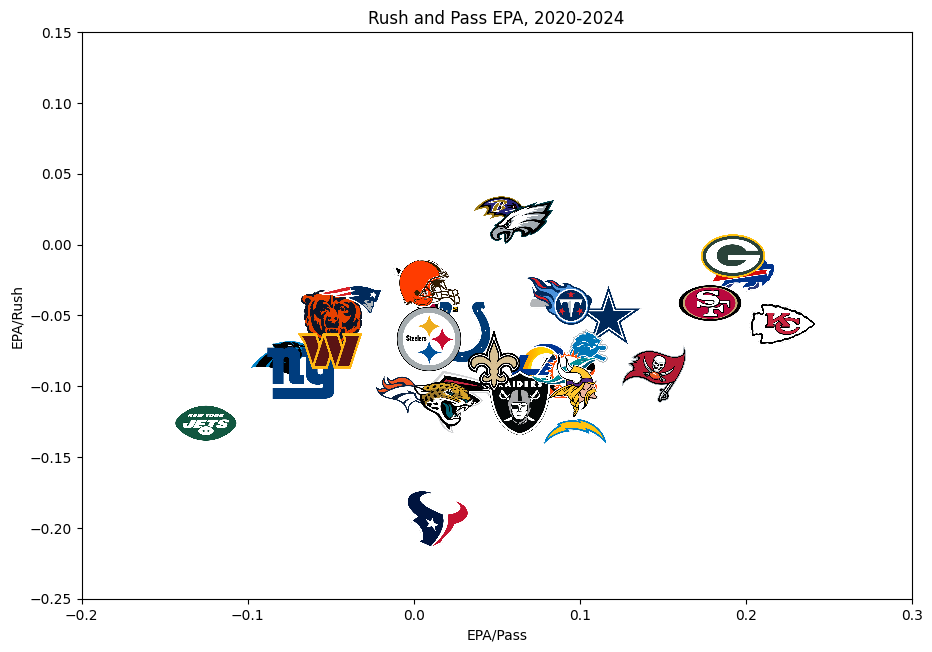

In [21]:
plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams["figure.autolayout"] = True

def getImage(path):
    return OffsetImage(plt.imread(path, format="tif"), zoom=.1)

x = epa_with_logos['pass_epa']
y = epa_with_logos['rush_epa']
paths = epa_with_logos['logo_path']

fig, ax = plt.subplots()

for x0, y0, path in zip(x, y, paths):
   ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
   ax.add_artist(ab)

plt.xlim(-0.2, 0.3)
plt.ylim(-0.25, 0.15)
plt.title("Rush and Pass EPA, 2020-2024")
plt.xlabel("EPA/Pass")
plt.ylabel("EPA/Rush")
plt.show()

In [24]:
pbp = nfl.import_pbp_data([2020, 2021, 2022, 2023])

# Filter out plays where either pass or rush occurred
pbp_rp = pbp[(pbp['pass'] == 1) | (pbp['rush'] == 1)]
pbp_rp = pbp_rp.dropna(subset=['epa', 'posteam', 'defteam'])

# Group by player instead of team for pass and rush EPA
pass_epa = pbp_rp[(pbp_rp['pass'] == 1)].groupby('passer_player_name')['epa'].mean().reset_index().rename(columns={'epa': 'pass_epa'})
rush_epa = pbp_rp[(pbp_rp['rush'] == 1)].groupby('rusher_player_name')['epa'].mean().reset_index().rename(columns={'epa': 'rush_epa'})

# Merge pass and rush EPA data
epa = pd.merge(pass_epa, rush_epa, how='outer', left_on='passer_player_name', right_on='rusher_player_name')
epa['player_name'] = epa['passer_player_name'].fillna(epa['rusher_player_name'])

# Drop NaN values and select relevant columns
epa = epa.dropna(subset=['player_name'])
epa = epa[['player_name', 'pass_epa', 'rush_epa']]

# Fetch player images
player_images = nfl.import_player_images()
player_images = player_images.rename(columns={'gsis_id': 'player_name'})

# Merge player images with EPA data
epa_with_images = pd.merge(epa, player_images, on='player_name', how='inner')

# Download player images
image_paths = []
if not os.path.exists("player_images"):
    os.makedirs("player_images")

for idx, row in epa_with_images.iterrows():
    image_url = row['image_url']
    player_name = row['player_name']
    image_path = f"player_images/{player_name.replace(' ', '_')}.png"
    urllib.request.urlretrieve(image_url, image_path)
    image_paths.append(image_path)

epa_with_images['image_path'] = image_paths

# Plotting
plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams["figure.autolayout"] = True

def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.2)

x = epa_with_images['pass_epa']
y = epa_with_images['rush_epa']
paths = epa_with_images['image_path']

fig, ax = plt.subplots()

for x0, y0, path in zip(x, y, paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)

plt.xlim(-0.2, 0.3)
plt.ylim(-0.25, 0.15)
plt.title("Rush and Pass EPA, 2020-2024")
plt.xlabel("EPA/Pass")
plt.ylabel("EPA/Rush")
plt.show()

2020 done.
2021 done.
2022 done.
2023 done.
Downcasting floats.


AttributeError: module 'nfl_data_py' has no attribute 'import_player_images'